# Making a Seat Belt Classifier with VGG16

### Loading the VGG16 Model

In [ ]:
from tensorflow.keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224

#Loads the VGG16 model
vgg16 = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

### Inpsecting each layer

In [ ]:
# Let's print our layers
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer True
1 Conv2D True
2 Conv2D True
3 MaxPooling2D True
4 Conv2D True
5 Conv2D True
6 MaxPooling2D True
7 Conv2D True
8 Conv2D True
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True


### Let's freeze all layers except the top 4

In [ ]:
from tensorflow.keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 64
img_cols = 64

# Re-loads the VGG16 model without the top or FC layers
vgg16 = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg16.layers:
    layer.trainable = False

# Let's print our layers
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


### Let's make a function that returns our FC Head

In [ ]:
def addTopModel(bottom_model, num_classes, D=256):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

### Let's add our FC Head back onto VGG

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Model

num_classes = 2

FC_Head = addTopModel(vgg16, num_classes)

model = Model(inputs=vgg16.input, outputs=FC_Head)

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,239,746 (58.14 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [ ]:
!unzip /content/flower.zip

Archive:  /content/flower.zip
replace flower/train/rose/10063573746_dae22f863b_c.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Loading our Dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/flower/train'
validation_data_dir = '/content/flower/val'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      )

validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 10
val_batchsize = 16

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 1999 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [ ]:
train_generator.class_indices


{'rose': 0, 'sunflower': 1}

### Training our top layers

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/flower.keras",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

nb_train_samples = 1999
nb_validation_samples = 14
epochs = 10
batch_size = 16

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples)



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 196/1999 ━━━━━━━━━━━━━━━━━━━━ 1:11 39ms/step - accuracy: 0.8695 - loss: 0.3207

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: val_loss improved from inf to 0.03717, saving model to /content/flower.keras
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9213 - loss: 0.1935 - val_accuracy: 1.0000 - val_loss: 0.0372
Epoch 2/10
 199/1999 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.9635 - loss: 0.0929
Epoch 2: val_loss improved from 0.03717 to 0.03406, saving model to /content/flower.keras
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9603 - loss: 0.1070 - val_accuracy: 1.0000 - val_loss: 0.0341
Epoch 3/10
 200/1999 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.9684 - loss: 0.0810
Epoch 3: val_loss improved from 0.03406 to 0.01451, saving model to /content/flower.keras
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9586 - loss: 0.1045 - val_accuracy: 1.0000 - val_loss: 0.0145
Epoch 4/10
 198/1999 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.9715 - loss: 0.0965
Epoch 4: val_loss did not improve from 0.01451
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.

In [ ]:
# CLASSIFICATION REPORT AND THE CONFUSION MATRIX FOR THE vgg16
# Displaying our Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib
class_labels = {0:'rose',1:'sunflower'}
#Confution Matrix and Classification Report
Y_pred = model.predict(validation_generator, nb_validation_samples) # put classifier not model
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Confusion Matrix
[[7 0]
 [0 7]]
Classification Report
              precision    recall  f1-score   support

        rose       1.00      1.00      1.00         7
   sunflower       1.00      1.00      1.00         7

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [ ]:
model.save

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step


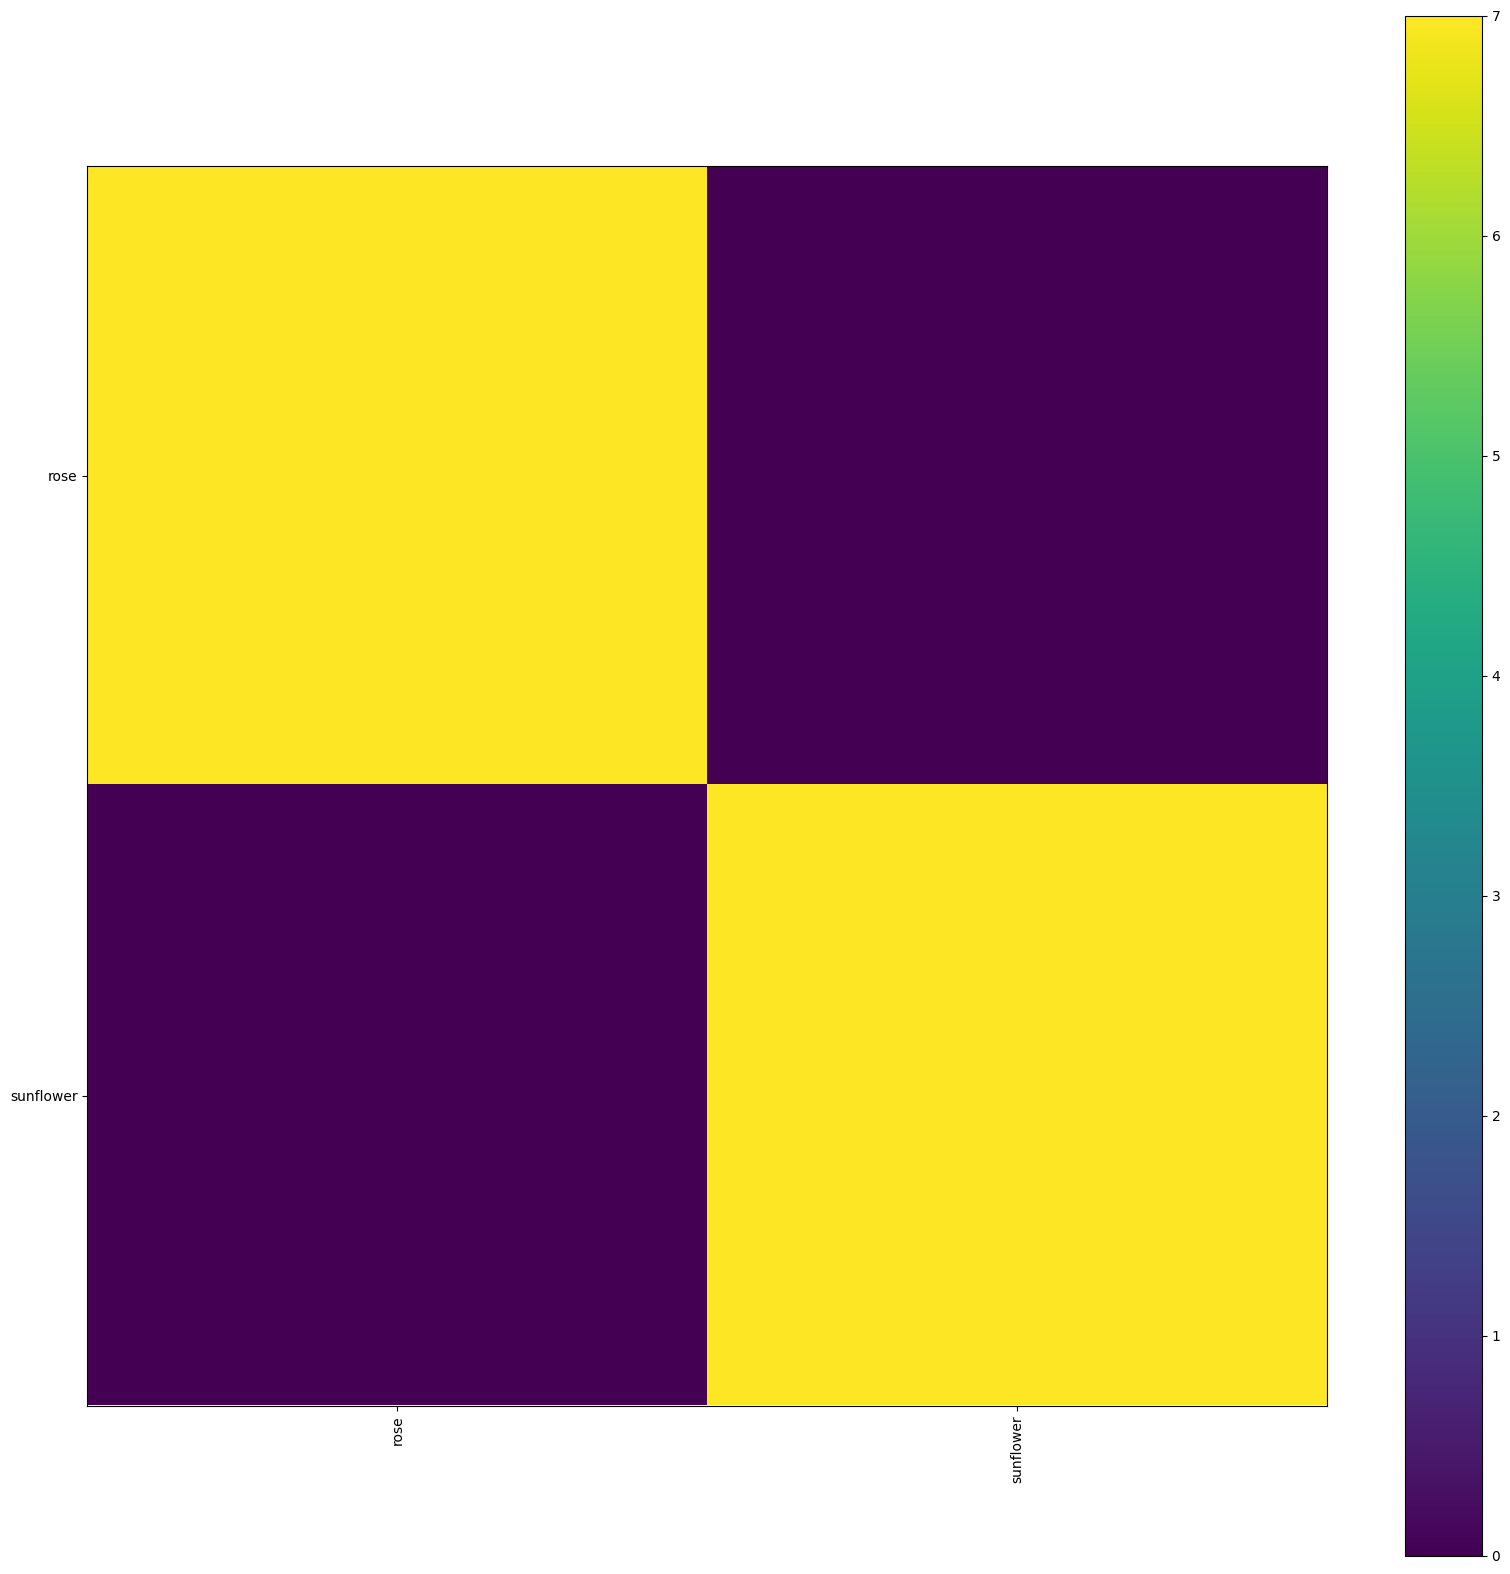

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 224,224,3
model = load_model('/content/flower.keras')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 475
nb_validation_samples = 139

#Confution Matrix and Classification Report
Y_pred = model.predict(validation_generator, nb_validation_samples)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

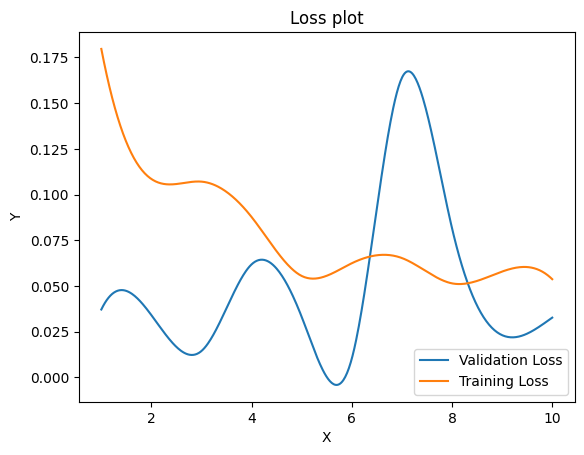

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
n = len(loss_values)
epochs = range(1, len(loss_values) + 1)
y=history_dict['loss']
y1=history_dict['val_loss']

model = make_interp_spline(epochs, y)
model1 = make_interp_spline(epochs, y1)
xs=np.linspace(1,n,500)
ys=model(xs)
ys1 = model1(xs)

plt.xlabel('Epochs')
plt.plot(xs, ys1, label='Validation Loss')
plt.plot(xs, ys,label='Training Loss')
plt.title("Loss plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

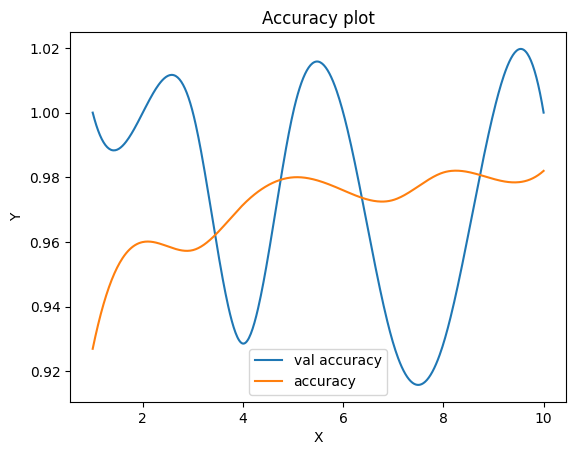

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
n = len(loss_values)
epochs = range(1, len(loss_values) + 1)
y=history_dict['accuracy']
y1=history_dict['val_accuracy']

model=make_interp_spline(epochs, y)
model1=make_interp_spline(epochs, y1)
xs=np.linspace(1,n,500)
ys=model(xs)
ys1 = model1(xs)
plt.xlabel('Epochs')
plt.plot(xs, ys1, label='val accuracy')
plt.plot(xs, ys,label='accuracy')
plt.title("Accuracy plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

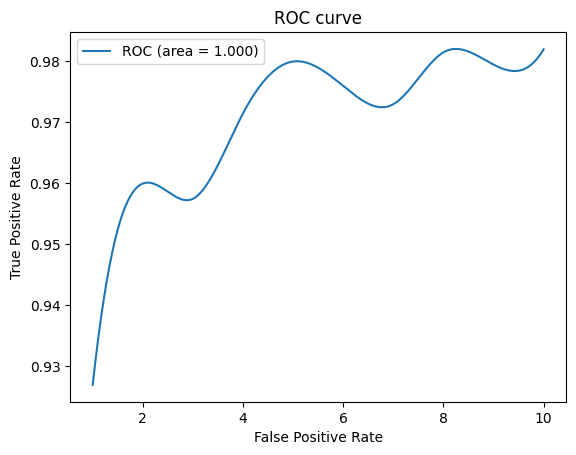

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds_keras = roc_curve(validation_generator.classes, y_pred)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
epochs = range(1, len(loss_values) + 1)
model=make_interp_spline(epochs, y)

xs=np.linspace(1,len(epochs),500)
ys=model(xs)
roc_auc_score = roc_auc_score(validation_generator.classes, y_pred)
plt.plot(xs,ys,label='ROC (area = {:.3f})'.format(roc_auc_score))
plt.title('ROC curve')
plt.legend(loc='best')
# plt.plot(xs, ys, label='val accuracy')
plt.show()

In [ ]:
history.history

{'accuracy': [0.9269635081291199,
  0.9599800109863281,
  0.9574787616729736,
  0.9714857339859009,
  0.9799900054931641,
  0.97598797082901,
  0.9729865193367004,
  0.9814907312393188,
  0.9794897437095642,
  0.9819909930229187],
 'loss': [0.1796436607837677,
  0.10850895941257477,
  0.10708046704530716,
  0.08772104233503342,
  0.05550570413470268,
  0.06246964633464813,
  0.06530504673719406,
  0.05146107077598572,
  0.05791977047920227,
  0.05373912304639816],
 'val_accuracy': [1.0,
  1.0,
  1.0,
  0.9285714030265808,
  1.0,
  1.0,
  0.9285714030265808,
  0.9285714030265808,
  1.0,
  1.0],
 'val_loss': [0.03717059642076492,
  0.034063227474689484,
  0.014512239024043083,
  0.06187515705823898,
  0.03308429941534996,
  0.010365285910665989,
  0.16387400031089783,
  0.08160090446472168,
  0.02313646487891674,
  0.03271932527422905]}

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
[[1. 0.]]
rose


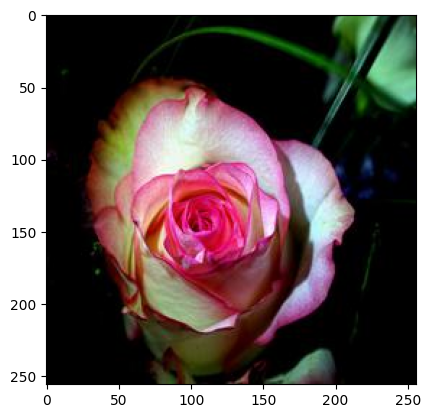

In [ ]:
#Testing the models
import tensorflow
import keras
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

# creating a object
model = keras.models.load_model('/content/flower.keras')

path = '/content/flower/val/rose/24841052213_90fc2b1046_c.jpg'
#path = '/content/drive/MyDrive/new_set_belt/new_seat_belt_REFINED_RAW_DATASET/test/positive/opencv_frame_28 (4).png'
test_image = load_img(path,target_size = (64,64,3)) #224 224
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
print(result)
result = np.argmax(result)
output = class_labels[result]
print(output)
# reading the image
testImage = img.imread(path)

# displaying the modified image
plt.imshow(testImage)